In [1]:
from climada.entity import ImpactFuncSet, ImpactFunc, ImpfSetTropCyclone
import numpy as np
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood, flood_imp_func_set


def impact_fun_set_pop(threshold_rf=1):
    imp_fun_set_pop = ImpactFuncSet()
    imp_fun = ImpactFunc()
    imp_fun.haz_type = 'TC'
    imp_fun.id = 1
    imp_fun.name = 'impf_TC'
    imp_fun.intensity_unit = 'm/s'
    lin = np.ones(67)
    imp_fun.intensity = np.linspace(0, 100, num=100)
    imp_fun.mdd = np.concatenate((np.zeros(33), lin))
    imp_fun.paa = np.ones(len(imp_fun.mdd))
    imp_fun.check()
    imp_fun_set_pop.append(imp_fun)


    imp_fun = ImpactFunc()
    imp_fun.haz_type = 'RF'
    imp_fun.id = 1
    imp_fun.name = 'impf_RF'
    imp_fun.intensity_unit = 'm/s'
    lin = np.ones(1000 - int(threshold_rf * 100))
    imp_fun.intensity = np.linspace(0, 10, num=1000)
    imp_fun.mdd = np.concatenate((np.zeros(int(threshold_rf * 100)), lin))
    imp_fun.paa = np.ones(len(imp_fun.mdd))
    imp_fun.check()
    imp_fun_set_pop.append(imp_fun)
    return imp_fun_set_pop


def impact_function_set_assets():
    impf_set_assets = ImpfSetTropCyclone.from_calibrated_regional_ImpfSet()
    impf_set_flood = flood_imp_func_set()
    impf_set_assets._data.update(impf_set_flood._data)
    return impf_set_assets


def get_impf_id(cnt):
    for basin, iso_list in ImpfSetTropCyclone.get_countries_per_region()[2].items():
        for iso in iso_list:
            if iso == cnt:
                return basin, ImpfSetTropCyclone.get_countries_per_region()[1][basin]


In [7]:
impf_asets = impact_function_set_assets()

In [21]:
impf_asets.get_func()

{'TC': {1: <climada.entity.impact_funcs.trop_cyclone.ImpfTropCyclone at 0x7f94e02b5310>,
  2: <climada.entity.impact_funcs.trop_cyclone.ImpfTropCyclone at 0x7f94e02b5940>,
  3: <climada.entity.impact_funcs.trop_cyclone.ImpfTropCyclone at 0x7f94e02b1160>,
  4: <climada.entity.impact_funcs.trop_cyclone.ImpfTropCyclone at 0x7f94e02b1be0>,
  5: <climada.entity.impact_funcs.trop_cyclone.ImpfTropCyclone at 0x7f94e02b1a90>,
  6: <climada.entity.impact_funcs.trop_cyclone.ImpfTropCyclone at 0x7f94e02b1f70>,
  7: <climada.entity.impact_funcs.trop_cyclone.ImpfTropCyclone at 0x7f94e02b11c0>,
  8: <climada.entity.impact_funcs.trop_cyclone.ImpfTropCyclone at 0x7f94e02b10d0>,
  9: <climada.entity.impact_funcs.trop_cyclone.ImpfTropCyclone at 0x7f94e02b19d0>,
  10: <climada.entity.impact_funcs.trop_cyclone.ImpfTropCyclone at 0x7f94e02b1a00>},
 'RF': {1: <climada_petals.entity.impact_funcs.river_flood.ImpfRiverFlood at 0x7f94e02b1730>,
  2: <climada_petals.entity.impact_funcs.river_flood.ImpfRiverFlood 

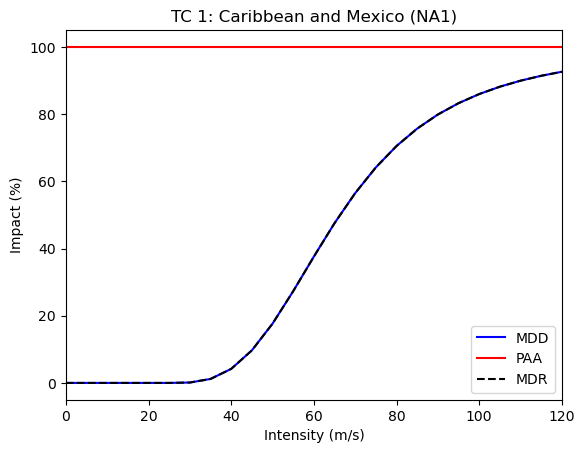

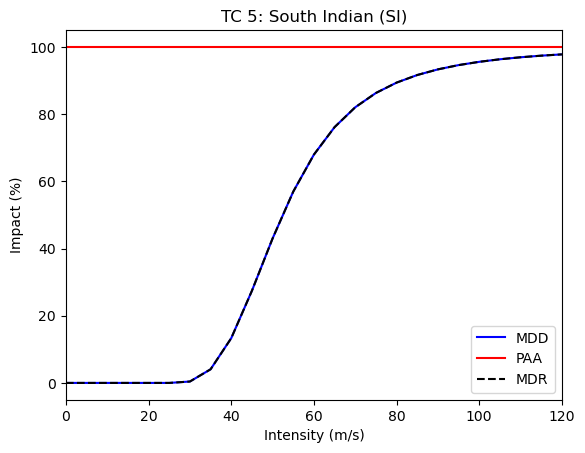

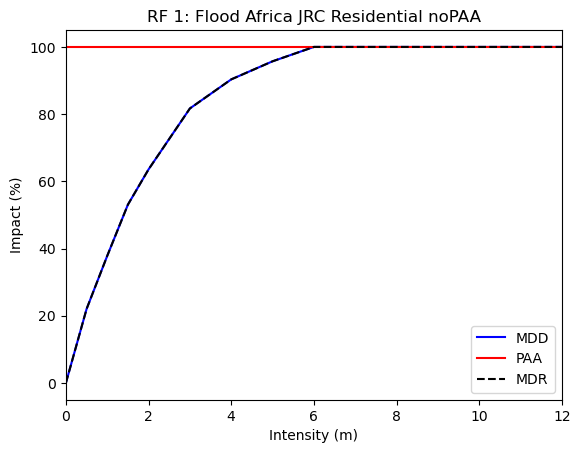

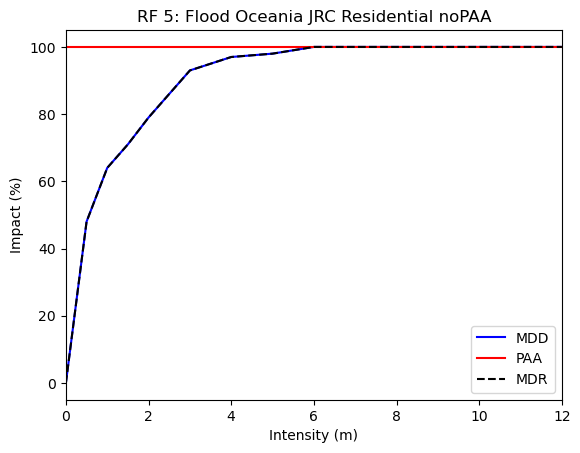

In [20]:
import matplotlib.pyplot as plt

impf_asets.get_func()['TC'][1].plot()
plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report_SI/figures/impf_tc_1.jpg', dpi=1200, bbox_inches='tight')
impf_asets.get_func()['TC'][5].plot()
plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report_SI/figures/impf_tc_5.jpg', dpi=1200, bbox_inches='tight')

impf_asets.get_func()['RF'][1].plot()
plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report_SI/figures/impf_rf_1.jpg', dpi=1200, bbox_inches='tight')

impf_asets.get_func()['RF'][5].plot()
plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report_SI/figures/impf_rf_5.jpg', dpi=1200, bbox_inches='tight')


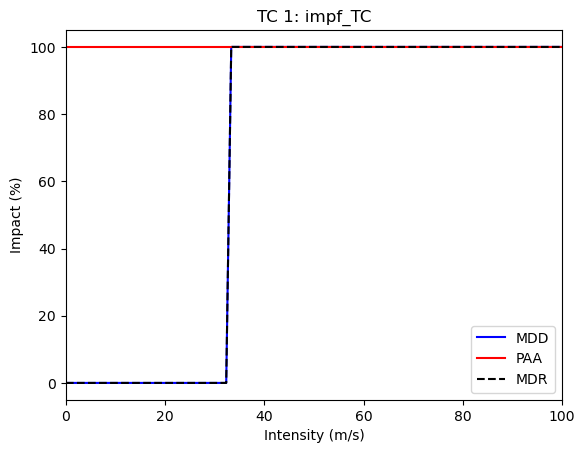

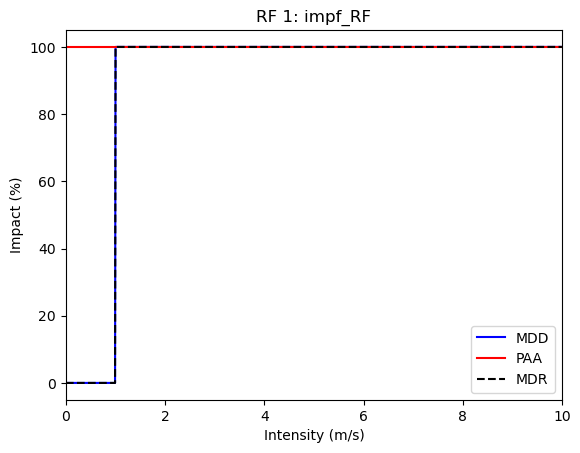

In [19]:
import matplotlib.pyplot as plt
impf_pop = impact_fun_set_pop()

impf_pop.get_func()['TC'][1].plot()
plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report_SI/figures/impf_tc_pop.jpg', dpi=1200, bbox_inches='tight')

impf_pop.get_func()['RF'][1].plot()
plt.savefig('/Users/szelie/Dropbox/Applications/Overleaf/multi_risk_scientific_report_SI/figures/impf_rf_pop.jpg', dpi=1200, bbox_inches='tight')
